In [1]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

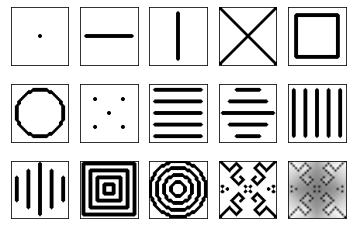

In [2]:
#Imagens básicas como entrada
img00 = cv.imread("../gcPDI/imgSimple/00sDot.png",0)
img01 = cv.imread("../gcPDI/imgSimple/01sHorizontal.png",0)
img02 = cv.imread("../gcPDI/imgSimple/02sVertical.png",0)
img03 = cv.imread("../gcPDI/imgSimple/03sX.png",0)
img04 = cv.imread("../gcPDI/imgSimple/04sSquare.png",0)
img05 = cv.imread("../gcPDI/imgSimple/05sCircle.png",0)
img10 = cv.imread("../gcPDI/imgSimple/10mDots.png",0)
img11 = cv.imread("../gcPDI/imgSimple/11mHorizontals.png",0)
img12 = cv.imread("../gcPDI/imgSimple/12mHorizontals2.png",0)
img13 = cv.imread("../gcPDI/imgSimple/13mVerticals.png",0)
img14 = cv.imread("../gcPDI/imgSimple/14mVerticals2.png",0)
img15 = cv.imread("../gcPDI/imgSimple/15mSquares.png",0)
img16 = cv.imread("../gcPDI/imgSimple/16mCircles.png",0)
img20 = cv.imread("../gcPDI/imgSimple/20random.png",0)
img21 = cv.imread("../gcPDI/imgSimple/21colorRandom.png",0)
simpleImg = [img00, img01, img02, img03, img04, img05, img10, img11, img12, img13, img14, img15, img16, img20, img21]              
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(simpleImg[i],cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

## Sobel
(Sobel Filter, Sobel Operator, Sobel–Feldman Operator) https://www.researchgate.net/publication/239398674_An_Isotropic_3x3_Image_Gradient_Operator

### Teoria 

O **Filtro Sobel** é outro filtro passa-alta que seu desenvolvimento está pautado nos conceitos de diferenciação no domínio do tempo discreto. Esse filtro é usado como um simples detector de horizontalidade e verticalidade das bordas.

As máscaras de Sobel possuem melhores características de supressão de ruído (suavização), isso as torna preferíveis por conta da supressão de ruído ser uma questão importante ao lidar com derivadas.

### Manipulações com OpenCV

ksize = 1


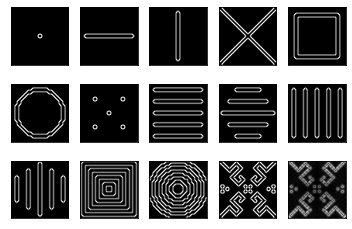

ksize = 3


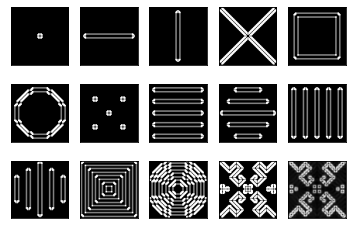

ksize = 5


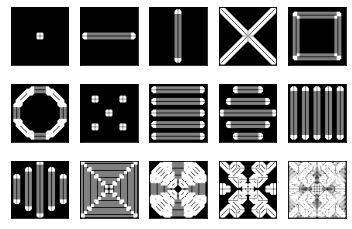

ksize = 7


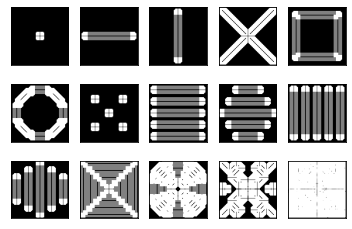

In [4]:
for ksize in [1,3,5,7]: #Valores admitidos para kernel
    for i in range(15):
        plt.subplot(3,5,i+1)
        
        #Início Sobel
        scale = 1
        delta = 0
        ddepth = cv.CV_16S
        #Derivadas x e y
        grad_x = cv.Sobel(simpleImg[i], ddepth, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
        grad_y = cv.Sobel(simpleImg[i], ddepth, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
        #Converter CV_8U image
        abs_grad_x = cv.convertScaleAbs(grad_x)
        abs_grad_y = cv.convertScaleAbs(grad_y)  
        #Gradiente
        dst = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
        #Final Sobel
        
        plt.imshow(dst,cmap='gray')
        plt.xticks([]),plt.yticks([])
    print("ksize = {}".format(ksize))
    plt.show()

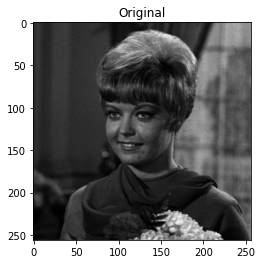

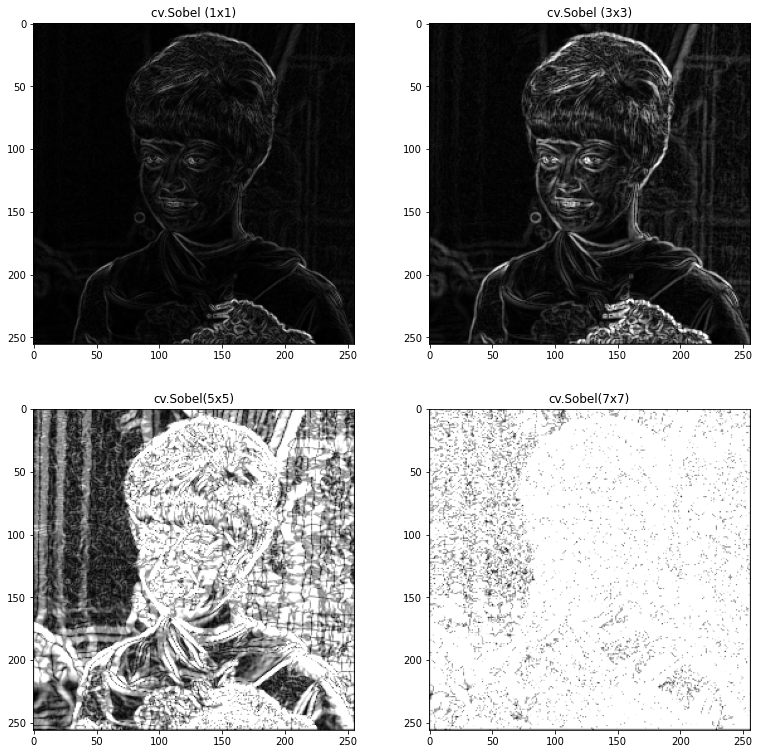

In [8]:
#Loop para 6 kernels
img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(2, 2)
i=0
for ksize in [1,3,5,7]: #Valores admitidos para kernel  
    #Início Sobel
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    #Derivadas x e y
    grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    #Converter CV_8U image
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)  
    #Gradiente
    dst = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    #Final Sobel    
    f.set_figheight(13)
    f.set_figwidth(13)    
    if ksize < 5 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.Sobel ({}x{})".format(ksize,ksize))
    else:
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.Sobel({}x{})".format(ksize,ksize))
    i+=1
plt.show()  

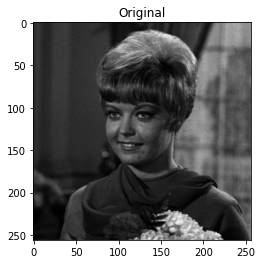

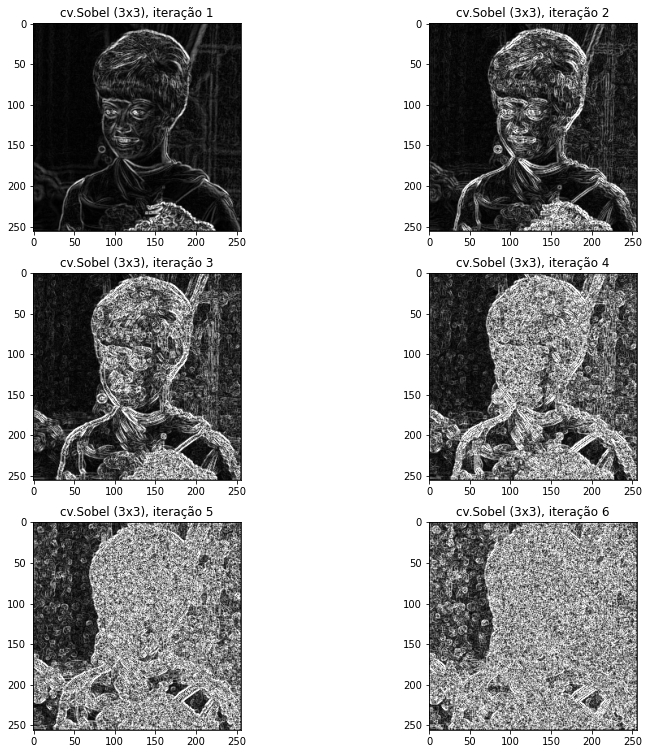

In [11]:
#Loop para 6 Iterações
dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
ksize=3
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    #Início Sobel
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    #Derivadas x e y
    grad_x = cv.Sobel(dst, ddepth, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(dst, ddepth, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    #Converter CV_8U image
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)  
    #Gradiente
    dst = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    #Final Sobel 
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.Sobel ({}x{}), iteração {}".format(ksize,ksize,i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.Sobel ({}x{}), iteração {}".format(ksize,ksize,i+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.Sobel ({}x{}), iteração {}".format(ksize,ksize,i+1))
plt.show()

### Desenvolvimento do Filtro

O operador de sobel representa uma derivação de primeira ordem no espaço, representada pelo gradiente(taxa de variação) nas direções do sinal bidimensional, similar ao Prewitt.
Podemos aproximar o gradiente somando as projeções de todos os pares vizinho-centro na direção do gradiente. O kernel de Sobel é apenas um método particular de ponderar as diferentes contribuições.
$$\frac{\partial f}{\partial x} = f(x+1) -  f(x)$$
O kernel de Sobel é apenas um método particular de ponderar as diferentes contribuições

$$ grad(f) = \left(\begin{array}{ccc} gx \\ gy  \end{array}\right) = \left(\begin{array}{ccc} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}  \end{array}\right) $$

Há interesse na contribuição para o gradiente em uma direção específica, então projeta-se o gradiente direcional do pixel central para o pixel vizinho na direção de interesse. Isso é feito tomando o produto escalar dos vetores unitários nas respectivas direções.

O gradiente mede a mudança infinitesimal em um ponto, aproximado por diferenças finitas. A diferença de valor do pixel central para o pixel vizinho deve ser distribuída ao longo de sua distância a fim de obter as unidades de crescimento por unidade de distância.
$$\left( \begin{array}{ccc}
a & b & c \\
d & Z & e \\
f & g & h \end{array} \right)\ $$
$$\left( \begin{array}{ccc}
(-1,-1) & (0,-1) & (1,-1) \\
(-1,0) & 0 & (1,0) \\
(-1,1) & (0,1) & (1,1) \end{array} \right)\ $$

Com o kernel horizontal na direção (1,0), os fatores podem ser representados como:

$$\left( \begin{array}{ccc}
\frac{1}{\sqrt{2}}*(\frac{1}{\sqrt{2}}*(-1,-1)\cdot(1,0)) & \frac{1}{1}*(\frac{1}{1}*(0,-1)\cdot(1,0)) & \frac{1}{\sqrt{2}}*(\frac{1}{\sqrt{2}}*(1,-1)\cdot(1,0))\\
\frac{1}{1}*(\frac{1}{1}*(1,0)\cdot(1,0)) & 0*(0*(0,0)\cdot(1,0)) & \frac{1}{1}*(\frac{1}{1}*(1,0)\cdot(1,0))\\
\frac{1}{\sqrt{2}}*(\frac{1}{\sqrt{2}}*(-1,1)\cdot(1,0)) & \frac{1}{1}*(\frac{1}{1}*(0,1)\cdot(1,0)) & \frac{1}{\sqrt{2}}*(\frac{1}{\sqrt{2}}*(1,1)\cdot(1,0)) \end{array} \right)\ $$

$$\left( \begin{array}{ccc}
-\frac{1}{2} & 0 & \frac{1}{2} \\
-1 & 0 & 1 \\
-\frac{1}{2} & 0 & \frac{1}{2} \end{array} \right)\ $$

Para utilizar números inteiros

$$\left( \begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \end{array} \right)\ $$
O efeito do vetor gradiente pode ser traduzido pela a aplicação de duas máscaras, nas direções $x$ e $y$ da imagem. A máscara em y será dada como:
$$\left( \begin{array}{ccc}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \end{array} \right)\ $$

É importante ressaltar que o somatório dos valores da máscara devem ser sempre zero, por ser um operador derivativo.

A magnitude imposta pelo vetor gradiente é transmitida ao pixel pela seguinte equação:

$$ M(x,y) = \sqrt{gx^2 + gy^2} $$ 

In [12]:
def filterSobel (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf
    # Load image into numpy matrix
    A = Filter.img
    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape
    ## Pre-set steps:
    ### Generate two kernersl (horizontal and vertical)
    Filter.kernel = nf.structtype()
    Filter.kernel.horz = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.horz[:, 0] = -1
    Filter.kernel.horz[int(Filter.kernelSize/2), 0] = -2
    Filter.kernel.horz[:, (Filter.kernelSize - 1)] = 1
    Filter.kernel.horz[int(Filter.kernelSize/2), (Filter.kernelSize - 1)] = 2
    Filter.kernel.vert = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.vert[0, :] = -1
    Filter.kernel.vert[0, int(Filter.kernelSize/2)] = -2
    Filter.kernel.vert[(Filter.kernelSize - 1), :] = 1
    Filter.kernel.vert[(Filter.kernelSize - 1), int(Filter.kernelSize/2)] = 2
    #################
    central = m.floor((Filter.kernelSize / 2))
    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A
    ##  Run the kernel over the matrix (similar to convolution):
    somaHorz = 0;
    somaVert = 0;
    D = np.zeros(A.shape)
    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):
                    somaHorz = (C[j + kl, k + kk] * Filter.kernel.horz[kl, kk]) + somaHorz
                    somaVert = (C[j + kl, k + kk] * Filter.kernel.vert[kl, kk]) + somaVert
            Ph = m.ceil((somaHorz / (Filter.kernelSize ** 2)))
            Pv = m.ceil((somaVert / (Filter.kernelSize ** 2)))
            somaHorz = 0
            somaVert = 0
            D[j, k] = np.sqrt(Ph**2 + Pv**2)
    D = np.uint8(D)
    print('#',end=".")
    return D

In [13]:
def sobApply(img, napl):
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype()               
    Filter.img = np.array(img)
    Filter.imgSize = nf.structtype()
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape
    #################### Filtro da média
    # Kernel def:
    Filter.kernelSize = 3
    # Número de aplicações do filtro
    numAp = napl;
    # Variável auxiliar para guardar a saída
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))
    for k in range(0, numAp):
        if k == 0:
            U[k,:,:] = filterSobel(Filter)
        else:
            Filter.img = U[k-1,:,:]
            U[k, :, :] = filterSobel(Filter)
    return U[(numAp - 1),:,:]

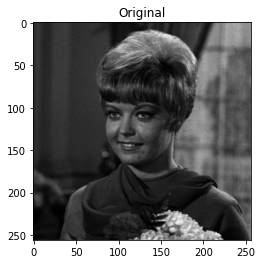

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.

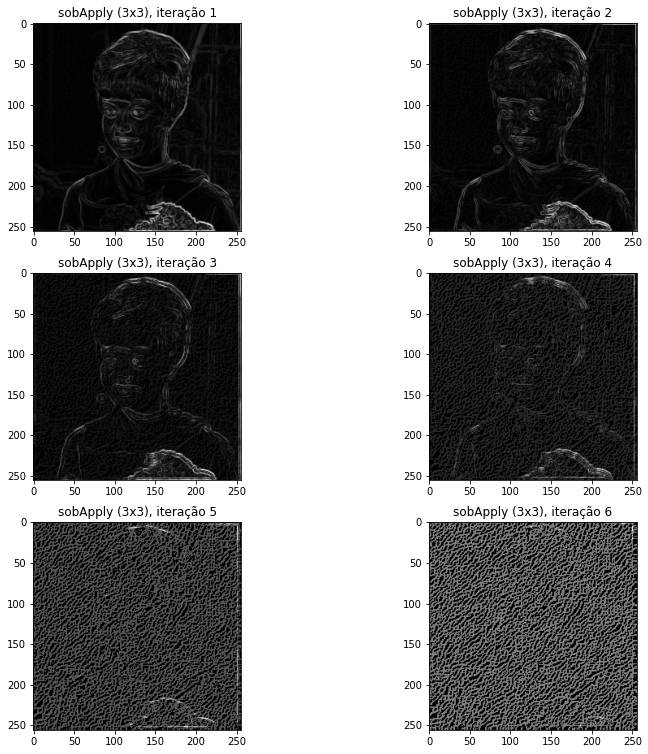

In [17]:
#Loop para 6 Iterações
src = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(src,cmap="gray")
plt.title("Original")
plt.show()
ksize=3
#nit=1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = sobApply(src, i+1)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("sobApply ({}x{}), iteração {}".format(ksize,ksize,i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("sobApply ({}x{}), iteração {}".format(ksize,ksize,i+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("sobApply ({}x{}), iteração {}".format(ksize,ksize,i+1))
plt.show()

Imagens de análise:


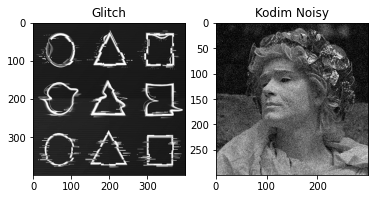

#.#.
 Kernel Size: 3, Iterações: 1


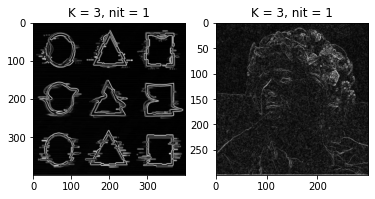

In [18]:
#Entradas do kernel e de iterações
ksize = 3 #<--
nits = 1
#Loop para A&B -> testar kernel
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = sobApply(imgA, nits)
imgBG = sobApply(imgB, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Imagens de análise:


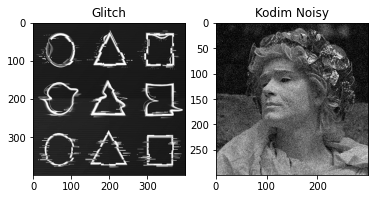

#.#.#.#.#.#.#.#.#.#.
 Kernel Size: 3, Iterações: 5


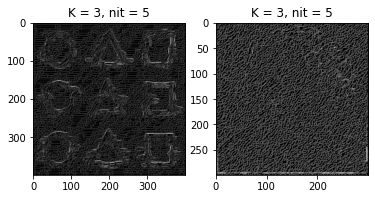

In [21]:
#Entradas do kernel e de iterações
ksize = 3
nits = 5 #<--
#Loop para A&B -> testar iteração
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = sobApply(imgA, nits)
imgBG = sobApply(imgB, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

#### Conclusões
O **Filtro Sobel** promove melhores suavizações na imagem ao aplicar um peso maior aos pixels adjacentes no cálculo do vetor gradiente daquele pixel.Esse filtro é vantajoso pela suavização promovida nas regiões mais próximas do pixel em operação e tende a aprensentar repostas menos ruidosas ainda que o filtro de Prewit.

Enquanto nos filtros Passa-Baixa há uma vantagem em múltiplas iterações, nos filtros Passa-Alta mostrou-se que mais do que 2 iterações já produz efeito bastante degradante, mostrando-se inviável para a grande maioria de aplicações que sejam possíveis no processamento digital de imagens.